# Effects of Ford Go Bike variables on the duration of usage

## Investigation Overview
For this exploration I decided to look at the effect that a range of numeric and categorical variables had on the duration of cycles. As this was the only continuous numeric attribute in the dataset, so it was the most logical to explore and the easiest to creates visualizations for.

## Dataset Overview
The dataset contained over 180,000 different cycles from the month of February 2019. There were many categorical attributes, including gender, subscriber status, bike share data and start day, as well as many discrete numeric attributes, like start hour, age and latitude/longitude values for the bike stations. There were 8,265 pieces of missing data that were removed, and the dataset was also retricted to include only those aged below 80 in order to eradicate outliers, removing a further 203 rows.

In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset in a pandas dataframe.
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [19]:
# convert 'start_hour' to float, and 'member_gender', 'user_type' and 'bike share_for_all_trip' to categorical data types, among others.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_name'] = df['start_station_name'].astype('category')
df['end_station_name'] = df['end_station_name'].astype('category')
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

In [20]:
# Create new columns for start hour, start day and member age to aid visualizations and convert start hour to float
df['start_hour'] = df.start_time.dt.strftime('%H')
df['start_day'] = df.start_time.dt.strftime('%A')
df['member_age'] = 2020 - df['member_birth_year']
df['start_hour'] = df['start_hour'].astype(float)

In [21]:
# Data Wrangling: Remove null values and remove outliers by restricting dataset to ages under 80.
df_1 = df[df['member_birth_year'].isnull()==False]
df_2 = df_1[df_1['start_station_name'].isnull()==False]
ford_clean = df_2[df_2['member_age']<81]

In [22]:
# Creating a restricted dataset with a max duration of 3000 seconds, containing 95% of the data without being affected by the extreme values.
ford_vlim = ford_clean[ford_clean['duration_sec']<3000]

## Duration Distribution
The original plot of the count for cycling duration is massively affected by skew, due to the extreme values of up to 80,000 seconds.

Using a log transformation to account for the extremely long tail, we see that the cycling durations take on a very large range of values, from about 60 at the lowest to abou𝑡 10,000 at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on a unimodal shape.

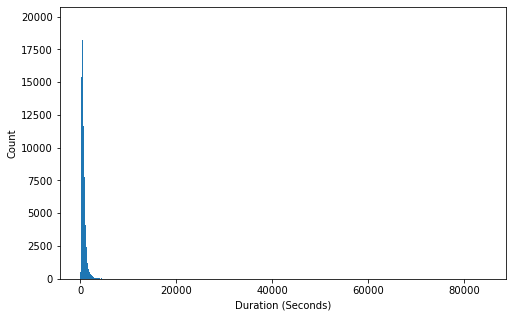

In [23]:
# Original histogram plot for duration distribution without limits
binsize = 80
bins = np.arange(0, ford_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data = ford_clean, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Seconds)')
plt.ylabel('Count')
plt.show()

(44.15704473533123, 10000.0)

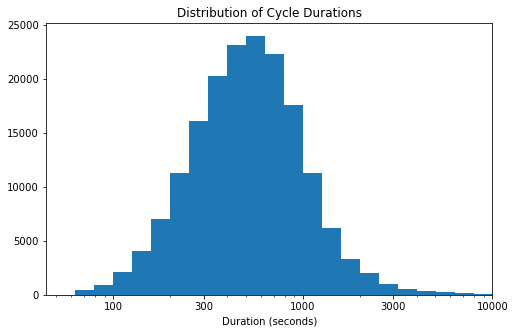

In [24]:
# Creating a new histogram plot for duration distribution with limits
plt.figure(figsize = (8,5))
bins = 10 ** np.arange(1.8, 4.9 + 0.1 , 0.1)
ticks = [100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = ford_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Cycle Durations')
plt.xlabel('Duration (seconds)')
plt.xlim(0, 10000)

## Univariate Conclusions

Through univariate exploration I was able to get more of a feel for the people that comprised the dataset. For example, the majority of the people using the bikes were male, Nearly 90% of the dataset was made up of subscribers as opposed to customers, and the majority rode solo as opposed to bike sharing. We also found that that the modal group for the dataset was the 30-35 year olds and nearly half of the data was made up of 25-35 year olds.

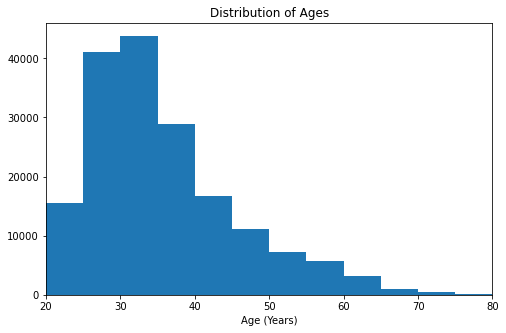

In [25]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, ford_clean['member_age'].max()+5, 5)
plt.hist(ford_clean['member_age'].dropna(), bins=bins);
plt.xlim(20,80)
plt.title('Distribution of Ages')
plt.xlabel('Age (Years)')
plt.show()

## Bivariate Conclusions

From my bivariate explorations, I was able to find that females rode slightly longer on average than males, and that bike sharers rode for slightly shorter durations. More resounding was the difference between subscribers and customers, who rode for for nearly twice the duration of subscribers on average. This seemed to be worth exploring further, as there had to be some explanations in the dataset for the difference.

Text(0, 0.5, 'Duration mean (seconds)')

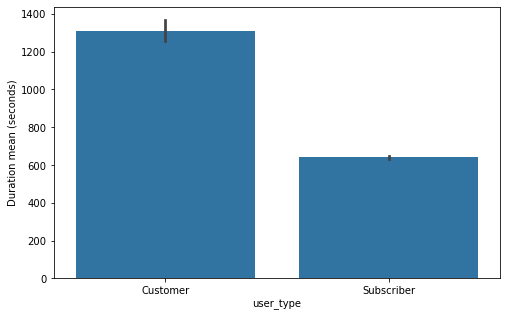

In [26]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[0]
sb.barplot(data = ford_clean, x = 'user_type', y = 'duration_sec',
              color=base_color);
plt.ylabel('Duration mean (seconds)')

## The Rush Hour Effect

The univariate consideration for the distribution of usage throughout the week showed a disparity between the usage on weekdays and weekends. A logical explanation for this is this the bike usage may be used primarily as a means of transportation to/from work, rather than leisure. This was evidenced in the bar chart below for the start time count.

Text(0.5, 1.0, 'Start Day Distribution')

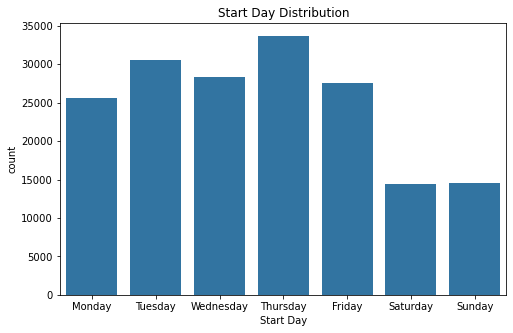

In [27]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=ford_clean, x='start_day', color=base_color, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.xlabel('Start Day')
plt.title('Start Day Distribution')

Text(0.5, 1.0, 'Start Time Bar Chart')

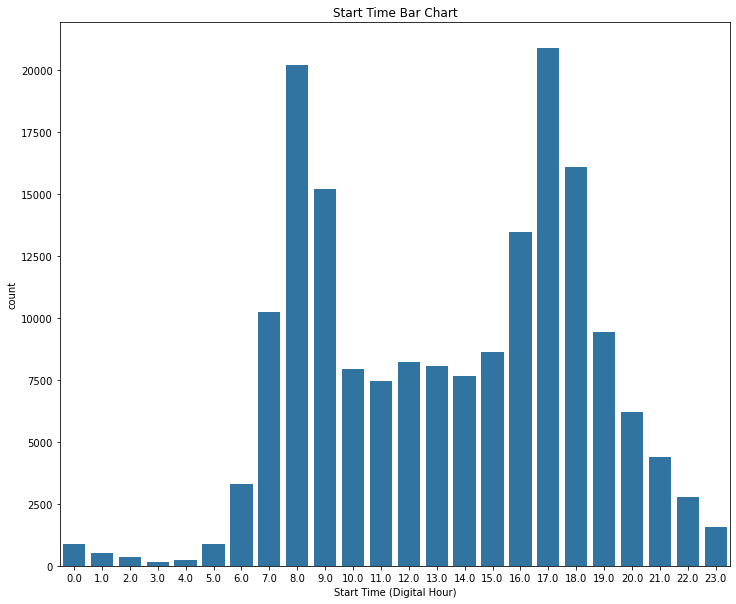

In [28]:
plt.figure(figsize=[12,10])
base_color = sb.color_palette()[0]
sb.countplot(data=ford_clean, x='start_hour', color=base_color);
plt.xlabel('Start Time (Digital Hour)')
plt.title('Start Time Bar Chart')

## Bivariate Exploration of the 'Rush Hour' Effect

Through Bivariate explorations I was able to discover that it was the 30-35 year old age bracket that had the greatest impact on this increased 'rush hour' count. In fact, it was mostly people between the ages of 25 and 35, which, as explored before, makes up a large proportion of our dataset, so this rush hour effect clearly has a major impact on the overall duration of cycling in our dataset. In the Duration vs Start Hour heatmap, we can see that this rush hour effect actually led to an increase in short cycle times, with a predomninant bracket of just 300-450 seconds.

Text(0.5, 1.0, ' Cycle Duration vs Member Age')

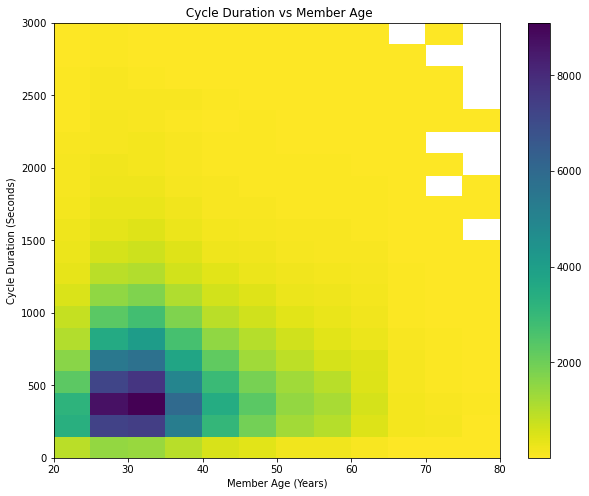

In [29]:
plt.figure(figsize = (10,8))
bins_x = np.arange(20, 80+5, 5)
bins_y = np.arange(0, 3000+5, 150)
plt.hist2d(data = ford_clean, x = 'member_age', y = 'duration_sec', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Member Age (Years)')
plt.ylabel('Cycle Duration (Seconds)')
plt.title(' Cycle Duration vs Member Age')

Text(0.5, 1.0, 'Cycle Duration vs Start Time')

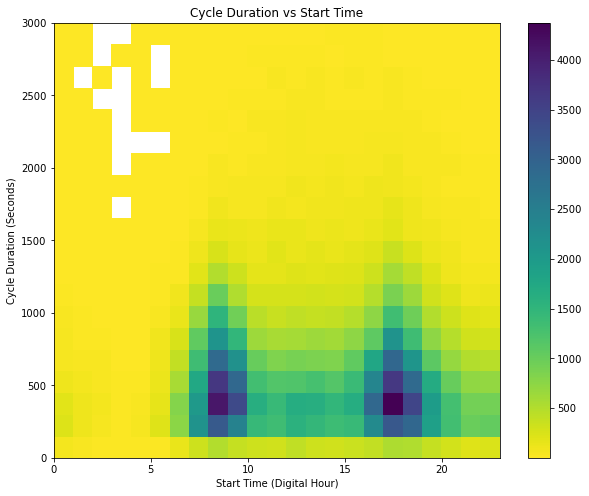

In [30]:
plt.figure(figsize = (10,8))
bins_x = np.arange(0, 23+1, 1)
bins_y = np.arange(0, 3000+150, 150)
plt.hist2d(data = ford_vlim, x = 'start_hour', y = 'duration_sec', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Start Time (Digital Hour)')
plt.ylabel('Cycle Duration (Seconds)')
plt.title('Cycle Duration vs Start Time')

## Multivariate Exploration

In order to draw conclusions from our multivariate visualizations, I had to make sure it wasn't overcrowded. I generated a random sample of 500 from the dataset to visualize. As seen from the average position of the points in the plot below, the 'Customer' duration is clearly higher than the average position for a 'Subscriber', which are more clustered below 1000. We can also see clustering around the rush hour times for subscribers which isn't as apparent for customers, whose values are more spread out throughout the day. This makes sense as it suggests that those who subscribe to the FordGoBikes scheme may do so with the intent to use them as a means of getting to/from work, which seems logical. People who are not subscribers will be slightly less likely to use such a scheme daily. Even without the effect of the 'rush hour' effect, it appears from the graph that the durations are longer on average for customers. This coupled with the bar chart above showing an average duration of fouble that for subscribers shows us that the user type has the greatest effect on duration of all of our original attributes in the dataset.

In [31]:
np.random.seed(2018)
sample = np.random.choice(ford_vlim.shape[0], 500, replace = False)
ford_clean_subset = ford_vlim.iloc[sample]

Text(0.5, 1.0, 'Cycle Duration vs Start Hour')

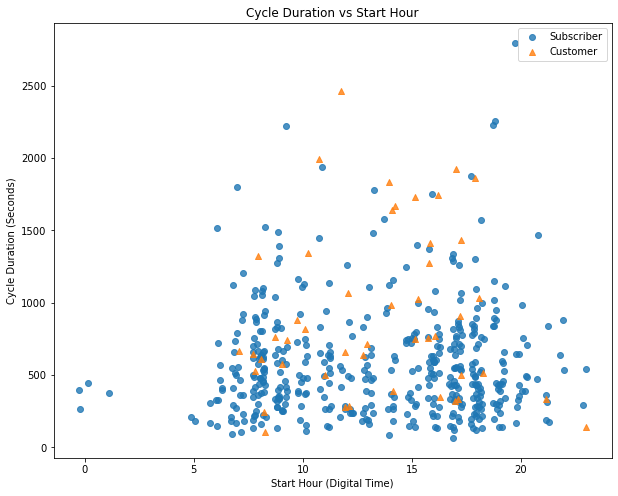

In [32]:
plt.figure(figsize = (10,8))
ttype_markers = [['Subscriber', 'o'],
                 ['Customer', '^']]

for ttype, marker in ttype_markers:
    plot_data = ford_clean_subset.loc[ford_clean_subset['user_type']==ttype]
    sb.regplot(data = plot_data, x = 'start_hour', y = 'duration_sec',
          x_jitter = 0.3, fit_reg = False, marker = marker)
plt.legend(['Subscriber', 'Customer'])
plt.xlabel('Start Hour (Digital Time)')
plt.ylabel('Cycle Duration (Seconds)')
plt.title('Cycle Duration vs Start Hour')